In [1]:
#from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import KNNImputer
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from imblearn.combine import SMOTETomek
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras.layers import TimeDistributed, Bidirectional, LSTM
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score as f1
import keras.backend as K
from tensorflow.keras.models import load_model
import plotly.express as px
from sklearn.cluster import KMeans
from keras.layers import Conv2D, MaxPooling2D, Flatten,Conv1D,MaxPooling1D,Reshape, Conv1DTranspose, LeakyReLU, BatchNormalization
from sklearn.svm import OneClassSVM
from sklearn.metrics import make_scorer
from tensorflow.keras.optimizers import Adam
from scipy.fft import fft
#frimport plotly.express as px
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

2024-04-23 18:06:12.352489: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 18:06:12.356628: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 18:06:12.397866: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 18:06:13.341266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# !pip install xgboost
# !pip install tensorflow

In [3]:
%run kaggleFunctions.ipynb

# 1. Download the data

In [4]:
df = pd.read_csv('Train_set.csv')
df

,ID,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T178,T179,T180,T181,T182,T183,T184,T185,T186,Class
0,0,0.965812,0.792023,0.116809,0.000000,0.162393,0.213675,0.264957,0.247863,0.270655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1.000000,0.597015,0.000000,0.109453,0.094527,0.084577,0.074627,0.094527,0.114428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.831382,0.714286,0.491803,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,1.000000,0.837705,0.236066,0.037705,0.252459,0.329508,0.319672,0.306557,0.304918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.868590,0.448718,0.490385,0.477564,0.461538,0.455128,0.416667,0.304487,0.182692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,87549,0.000000,0.060127,0.202532,0.306962,0.424051,0.471519,0.588608,0.664557,0.702532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
87550,87550,0.971154,0.910256,0.548077,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
87551,87551,1.000000,0.976378,0.527559,0.289370,0.084646,0.055118,0.066929,0.059055,0.055118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
87552,87552,0.907563,1.000000,0.464286,0.046218,0.241597,0.336134,0.283613,0.283613,0.300420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
Y_train=df.loc[:,'Class']
X_train=df.iloc[:,1:-1]

a, b, c, d = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)
# X_train, X_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [6]:
"""X_train=X_train.sort_index()
Y_train=Y_train.sort_index()
X_test=X_test.sort_index()
y_test=y_test.sort_index()"""

'X_train=X_train.sort_index()\nY_train=Y_train.sort_index()\nX_test=X_test.sort_index()\ny_test=y_test.sort_index()'

In [7]:
# fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
# for i in range(5):
#     for j in range(5):
#         ax[i,j].plot(X_train.iloc[np.where(Y_train==i)[0][j],:])
#         title='Class'+str(i)+', smaple '+str(j)
#         ax[i,j].set_title(title)

In [8]:
means=[]
maxims=[]
minms=[]
for i in range(5):
    means.append(np.mean(X_train.iloc[np.where(Y_train==i)], axis=1))
    maxims.append(np.max(X_train.iloc[np.where(Y_train==i)], axis=1))
    minms.append(np.min(X_train.iloc[np.where(Y_train==i)], axis=1))

In [9]:
# fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,15))
# p=[means,maxims,minms]
# for i in range(3):
#     for j in range(5):
#         ax[i,j].plot(p[i][j])
        

# 2. Preprocessing

## 2.1. Missing values

In [10]:
"""#Tarda 13 mins
n_missing = df.isna().sum(axis=1)
n_missing.plot(kind='bar')
plt.xlabel('Índice de fila')
plt.ylabel('Número de valores faltantes')
plt.title('Valores faltantes por fila en DataFrame')
plt.show()"""

"#Tarda 13 mins\nn_missing = df.isna().sum(axis=1)\nn_missing.plot(kind='bar')\nplt.xlabel('Índice de fila')\nplt.ylabel('Número de valores faltantes')\nplt.title('Valores faltantes por fila en DataFrame')\nplt.show()"

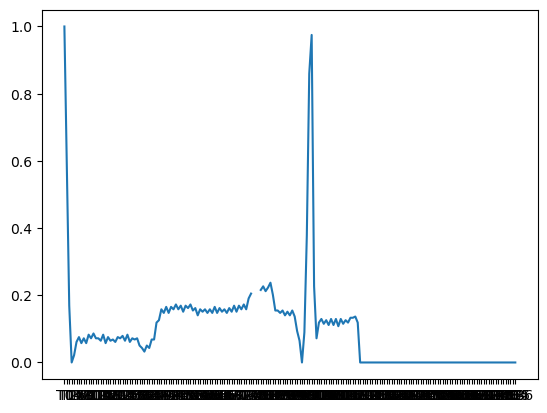

In [11]:
plt.plot(X_train.iloc[38,:])

In [12]:
X_train_spline, Y_train=interpolate(X_train,Y_train,'spline',1)

In [13]:
"""n_missing = X_train_spline.isna().sum(axis=1)
n_missing.plot(kind='bar')
plt.xlabel('Índice de fila')
plt.ylabel('Número de valores faltantes')
plt.title('Valores faltantes por fila en DataFrame')
plt.show()"""

"n_missing = X_train_spline.isna().sum(axis=1)\nn_missing.plot(kind='bar')\nplt.xlabel('Índice de fila')\nplt.ylabel('Número de valores faltantes')\nplt.title('Valores faltantes por fila en DataFrame')\nplt.show()"

Con esta celda aqui en vez de mas alante estoy mateniendo la proporcion en el set de test(no se si hay que hacerlo o no)

In [14]:
df.head()

,ID,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T178,T179,T180,T181,T182,T183,T184,T185,T186,Class
0,0,0.965812,0.792023,0.116809,0.000000,0.162393,0.213675,0.264957,0.247863,0.270655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1.000000,0.597015,0.000000,0.109453,0.094527,0.084577,0.074627,0.094527,0.114428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.831382,0.714286,0.491803,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,1.000000,0.837705,0.236066,0.037705,0.252459,0.329508,0.319672,0.306557,0.304918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.868590,0.448718,0.490385,0.477564,0.461538,0.455128,0.416667,0.304487,0.182692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [15]:

imp = IterativeImputer(max_iter=5, random_state=0)
imp.fit(df_train[['total_bill', 'size']])
imp_values=imp.transform(df_train[['total_bill', 'size']])
pd.DataFrame(imp_values,columns=['total_bill', 'size'])

NameError: name 'df_train' is not defined

## Outliers

In [16]:
Q1=[]
Q3=[]
IQR=[]
for i in range(5):
    Q1.append(X_train_spline.iloc[np.where(Y_train==i)[0],:].quantile(0.25))
    Q3.append(X_train_spline.iloc[np.where(Y_train==i)[0],:].quantile(0.75))
    IQR.append(Q3[i] - Q1[i]) 

IndexError: list index out of range

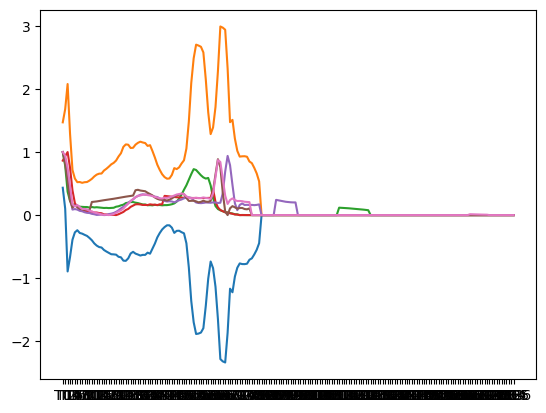

In [17]:
j=3
plt.plot(Q1[j] - 5* IQR[j],label='min')
plt.plot(Q3[j] + 5* IQR[j],label='max')
for i in range(100):
    if sum(((X_train_spline< (Q1[i] - 5* IQR[i])) | (X_train_spline> (Q3[i] + 5* IQR[i]))).sum(axis=1)>8)>0:
        plt.plot(X_train_spline.iloc[np.where(Y_train==j)[0][i],:],label='signal')
plt.legend()

In [18]:
outliers=[]
for i in range(5):
    out = ((X_train_spline.iloc[np.where(Y_train==i)[0],:]< (Q1[i] - 4* IQR[i])) | (X_train_spline.iloc[np.where(Y_train==i)[0],:] > (Q3[i] + 4* IQR[i]))).any(axis=1)
    outliers.append(out)

In [19]:
acc=0
for i in range(5):
    print(sum(outliers[i]))
    acc+=sum(outliers[i])
print('The total number of outliers is: '+str(acc))

39635
1305
2552
451
3368
The total number of outliers is: 47311


In [20]:
out = ((X_train_spline< (Q1[i] - 3* IQR[i])) | (X_train_spline> (Q3[i] + 3* IQR[i]))).any(axis=1)
X_train_spline_in=X_train_spline.loc[Y_train!=0|( (Y_train==0) & (~out)),:]
Y_train_spline_in=Y_train.loc[Y_train!=0|( (Y_train==0) & (~out))]

## 2.2 Unbalanced classes

Class
0    30617
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


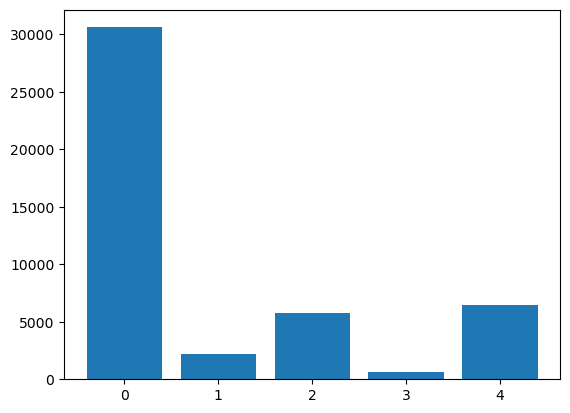

In [21]:
counts=pd.Series(Y_train_spline_in).value_counts()
unique_labels=pd.Series(Y_train_spline_in).value_counts().index
plt.bar(unique_labels,counts)
print(pd.Series(Y_train_spline_in).value_counts())

In [22]:
counts=pd.Series(y_test).value_counts()
unique_labels=pd.Series(Y_train).value_counts().index
plt.bar(unique_labels,counts)

NameError: name 'y_test' is not defined

In [23]:
# ALEJO

sampling_strategy = {0: int(counts[0]*0.8)}

# Crear una instancia de RandomUnderSampler y ajustar a los datos de entrenamiento
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_train_linear_resampled, y_train_linear_resampled = rus.fit_resample(X_train, Y_train)
X_train_spline_resampled, y_train_spline_resampled = rus.fit_resample(X_train_spline, Y_train)

In [24]:
# sampling_strategy = {0: int(counts[0]*0.8)}

# # Crear una instancia de RandomUnderSampler y ajustar a los datos de entrenamiento
# rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
# X_train_linear_resampled, y_train_linear_resampled = rus.fit_resample(X_train_linear, Y_train)
# X_train_spline_resampled, y_train_spline_resampled = rus.fit_resample(X_train_spline, Y_train)

<BarContainer object of 5 artists>

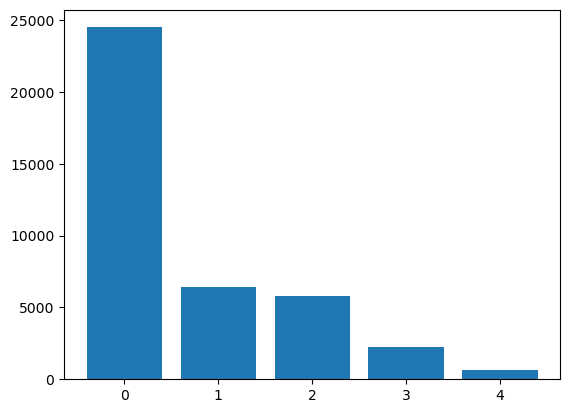

In [25]:
counts=pd.Series(y_train_linear_resampled).value_counts()
unique_labels=sorted(y_train_linear_resampled.unique())
plt.bar(unique_labels,counts)

In [26]:
counts=pd.Series(y_train_linear_resampled).value_counts()
sampling_strategy = {0: counts[0], 1: int(counts[0]*0.8), 2:int(counts[0]*0.8), 3: int(counts[0]*0.7), 4: int(counts[0]*0.6)}
ros = RandomOverSampler(random_state=0,sampling_strategy=sampling_strategy)
X_train_linear_resampled, y_train_linear_resampled = ros.fit_resample(X_train_linear_resampled, y_train_linear_resampled)
X_train_spline_resampled, y_train_spline_resampled = ros.fit_resample(X_train_spline_resampled, y_train_spline_resampled)

Class
0    24493
1    19594
2    19594
3    17145
4    14695
Name: count, dtype: int64


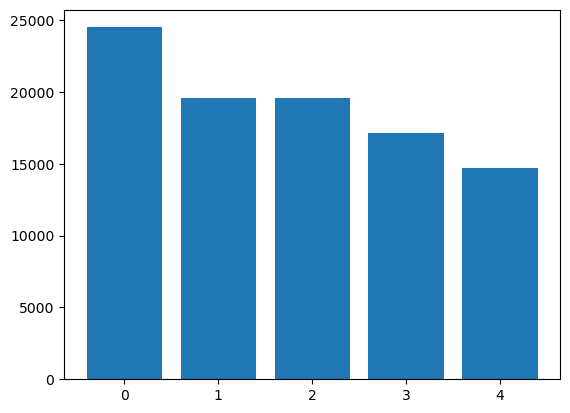

In [27]:
counts=pd.Series(y_train_linear_resampled).value_counts()
unique_labels=sorted(y_train_linear_resampled.unique())
plt.bar(unique_labels,counts)
print(pd.Series(y_train_linear_resampled).value_counts())

In [28]:
"""smt = SMOTETomek(random_state=42)
X_linear_SMOTET_resampled, y_linear_SMOTET_resampled = smt.fit_resample(X_train_linear, Y_train)
X_spline_SMOTET_resampled, y_spline_SMOTET_resampled = smt.fit_resample(X_train_spline, Y_train)
counts=pd.Series(y_spline_SMOTET_resampled).value_counts()
unique_labels=sorted(y_spline_SMOTET_resampled.unique())
plt.bar(unique_labels,counts)
print(pd.Series(y_spline_SMOTET_resampled).value_counts())"""

'smt = SMOTETomek(random_state=42)\nX_linear_SMOTET_resampled, y_linear_SMOTET_resampled = smt.fit_resample(X_train_linear, Y_train)\nX_spline_SMOTET_resampled, y_spline_SMOTET_resampled = smt.fit_resample(X_train_spline, Y_train)\ncounts=pd.Series(y_spline_SMOTET_resampled).value_counts()\nunique_labels=sorted(y_spline_SMOTET_resampled.unique())\nplt.bar(unique_labels,counts)\nprint(pd.Series(y_spline_SMOTET_resampled).value_counts())'

## 2.2 Replicating

## 2.3 Smothing

### 2.3.1 Moving average

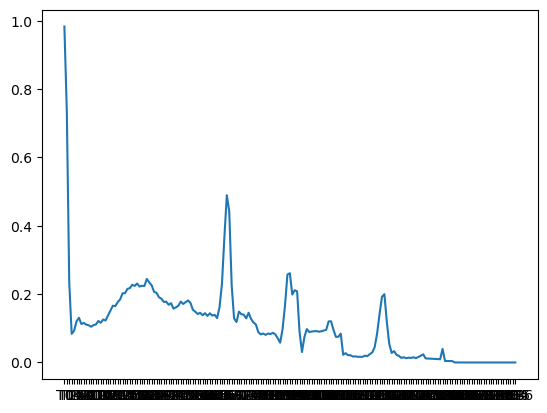

In [29]:
def moving_average(series, window_size):
    return series.rolling(window_size).mean()
X_train_spline_resampled_MA=moving_average(X_train_spline_resampled,5)
plt.plot(X_train_spline_resampled_MA.iloc[36,:])
plt.show()

### 2.3.1 Exponential moving average

In [30]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result, index=series.index)

X_train_spline_resampled_EMA = exponential_smoothing(X_train_spline_resampled,0.25)
plt.plot(X_train_spline_resampled_EMA.iloc[36,:])
plt.show()

KeyError: 0

# 3. Models

In [32]:
results=pd.DataFrame(columns=['model','train loss', 'test loss', 'train accuracy', 'test accuracy'])

In [35]:
results.head()

,model,train loss,test loss,train accuracy,test accuracy


In [31]:
"""X_test_spline = X_test.interpolate(method='spline', order=3)
X_test_spline=X_test_spline.iloc[2:,:]
y_test_spline=y_test[2:]
sum(X_test_spline.isna().sum())
X_train=X_train_spline_resampled.values
X_test=X_test_spline.values
y_train=y_train_spline_resampled
y_test=y_test_spline"""

"X_test_spline = X_test.interpolate(method='spline', order=3)\nX_test_spline=X_test_spline.iloc[2:,:]\ny_test_spline=y_test[2:]\nsum(X_test_spline.isna().sum())\nX_train=X_train_spline_resampled.values\nX_test=X_test_spline.values\ny_train=y_train_spline_resampled\ny_test=y_test_spline"

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_train_spline_resampled, y_train_spline_resampled, test_size=0.3, random_state=42)
#normalize
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

## 3.1 SVC

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(X_train_spline_resampled, y_train_spline_resampled, test_size=0.3, random_state=42)

# Set up the hyperparameters to test via cross-validation
# param_grid = {'C': [0.1,10,100], 'kernel': ['poly', 'rbf', 'sigmoid']}
param_grid = {'C': [0.1], 'kernel': ['poly']}

# Set up the GridSearchCV object
svm_grid = GridSearchCV(SVC(decision_function_shape='ovr'), param_grid, cv=5, verbose = 2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
svm_grid.fit(X_train, y_train)

# Print the best hyperparameters found
print(f"Best hyperparameters: {svm_grid.best_params_}")

# Evaluate the performance of the SVM classifier on the test data
y_pred = svm_grid.predict(X_test)
r2 = r2_score(y_test, y_pred)
accuracy = svm_grid.best_estimator_.score(X_test, y_test)

print(f"R2 score: {r2}")
print(f"Accuracy: {accuracy}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................C=0.1, kernel=poly; total time=14.8min
[CV] END .................................C=0.1, kernel=poly; total time=14.8min
[CV] END .................................C=0.1, kernel=poly; total time=14.8min
[CV] END .................................C=0.1, kernel=poly; total time=15.0min
[CV] END .................................C=0.1, kernel=poly; total time=15.0min
Best hyperparameters: {'C': 0.1, 'kernel': 'poly'}
R2 score: 0.4628001594243355
Accuracy: 0.8066789964057647


In [38]:
from sklearn.metrics import f1_score
import joblib

f1 = f1_score(y_test, y_pred, average='weighted')  # Compute F1 score
print(f"F1 score: {f1}")


F1 score: 0.8121741717127705


In [39]:
# Save the trained model to a file
model_filename = "svm_model.pkl"
joblib.dump(svm_grid.best_estimator_, model_filename)
print(f"Model saved to {model_filename}")

Model saved to svm_model.pkl


## 3.2 Recurrent Neural Network

In [ ]:
%run kaggleFunctions.ipynb

In [ ]:
imputers=['interpolation','KNN','RF','XGB']
#for i in imputers:
    

In [ ]:
X_train_reshaped,y_train,X_test_reshaped=finalPreprocessing(df,3)

TypeError: finalPreprocessing() missing 1 required positional argument: 'order'

In [ ]:
#the model
model = keras.Sequential()
model.add(layers.LSTM(124, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(32))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_score])
class_weights5 = {0: 0.4, 1: 20, 2:10, 3:30, 4:10}
history = model.fit(X_train, y_train, epochs=6, batch_size=4096, validation_split=0.1,class_weight=class_weights5)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


In [ ]:
#the model
model = keras.Sequential()
model.add(layers.LSTM(124, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(32))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_score])

class_weights1 = {0: 1, 1: 2, 2:2, 3:3, 4:2}
class_weights2 = {0: 1, 1: 7, 2:5, 3:10, 4:5}
class_weights3 = {0: 1, 1: 15, 2:12, 3:20, 4:12}
class_weights4 = {0: 1, 1: 30, 2:16, 3:70, 4:15}
class_weights5 = {0: 0.4, 1: 20, 2:10, 3:30, 4:10}
class_weights=[class_weights1,class_weights2,class_weights3,class_weights4,class_weights5]
f1=[]

for i in class_weights:
    history = model.fit(X_train, y_train, epochs=4, batch_size=4096, validation_split=0.1,class_weight=i)
    test_loss, test_f1 = model.evaluate(X_test, y_test)
    f1.append(test_f1)
    print('Test accuracy:', test_f1)


Epoch 1/4
40/40 [==============================] - 30s 653ms/step - loss: 1.6973 - f1_score: 0.2147 - val_loss: 0.0503 - val_f1_score: 0.3809
Epoch 2/4
40/40 [==============================] - 26s 637ms/step - loss: 0.1678 - f1_score: 0.3612 - val_loss: 0.0090 - val_f1_score: 0.3810
Epoch 3/4
40/40 [==============================] - 26s 642ms/step - loss: 0.0212 - f1_score: 0.3595 - val_loss: 0.0026 - val_f1_score: 0.3810
Epoch 4/4
821/821 [==============================] - 5s 6ms/step - loss: 1.7241 - f1_score: 0.2668
Test accuracy: 0.26681482791900635
Epoch 1/4
40/40 [==============================] - 26s 645ms/step - loss: 0.0198 - f1_score: 0.3597 - val_loss: 8.7187e-04 - val_f1_score: 0.3810
Epoch 2/4
40/40 [==============================] - 26s 649ms/step - loss: 0.0142 - f1_score: 0.3595 - val_loss: 7.2371e-04 - val_f1_score: 0.3810
Epoch 3/4
40/40 [==============================] - 27s 683ms/step - loss: 0.0111 - f1_score: 0.3596 - val_loss: 0.0012 - val_f1_score: 0.3810
Epoch 

0    23866
2     1693
4      356
1      344
3        6
dtype: int64


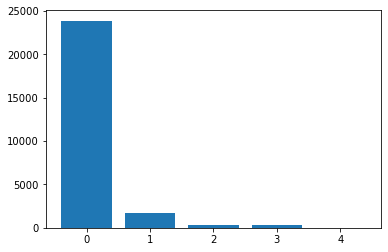

In [ ]:
prediction = model.predict(X_test)
myprediction=[np.argmax(pred) for pred in prediction ]
counts=pd.Series(myprediction).value_counts()
unique_labels=[sorted(np.unique(myprediction))]
plt.bar(unique_labels[0],counts)
print(pd.Series(myprediction).value_counts())

In [ ]:
ruta_modelo = "/content/drive/My Drive/redes_neuronales/modelo.h5"
model.save(ruta_modelo)


In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label='training loss')
plt.plot(val_loss,label='validation loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc,label='training accuracy')
plt.plot(val_acc,label='validation accuracy')
plt.xlabel('iterations')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
new_row=pd.DataFrame({'model': 'RNN spline data','train loss':[train_loss[-1]], 'test loss':test_loss, 'train accuracy':[train_acc[-1]], 'test accuracy':test_acc})
new_row

He probado linear y spline interpolation y las dos daban practicamente igual(las dos normalizados), asi que me quedo con spline que daba un poco mas pero para otros modelos puede que si camnbie mas de spline a linear.

Tb he porbado spline sin normalizar y solo daba un 90% asi que paso 

## 3.3 Transformer

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Crear un modelo Transformer
def transformer_model(input_shape, num_heads, ff_dim, dropout_rate):
    
    # Crear capa de entrada
    inputs = layers.Input(shape=input_shape)
    
    # Aplanar la entrada
    x = layers.Flatten()(inputs)
    
    # Agregar capas Transformer
    for i in range(num_heads):
        # Capa de atención multi-cabeza
        attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=64)(x, x)
        # Agregar normalización por capas y dropout
        attention = layers.LayerNormalization(epsilon=1e-6)(attention + x)
        attention = layers.Dropout(dropout_rate)(attention)
        
        # Capa feedforward
        ffn = keras.Sequential(
            [
                layers.Dense(ff_dim, activation="relu"),
                layers.Dense(input_shape[1])
            ]
        )
        # Agregar normalización por capas y dropout
        ffn_output = ffn(attention)
        ffn_output = layers.LayerNormalization(epsilon=1e-6)(ffn_output + attention)
        ffn_output = layers.Dropout(dropout_rate)(ffn_output)
        
        x = ffn_output
    
    # Agregar capa de salida con una neurona y activación 'softmax'
    output = layers.Dense(1, activation='softmax')(x)
    
    # Crear modelo
    model = keras.Model(inputs=inputs, outputs=output, name="transformer")
    return model

# Definir hiperparámetros
input_shape = (187, 1)
num_heads = 4
ff_dim = 64
dropout_rate = 0.2

# Crear modelo
model = transformer_model(input_shape, num_heads, ff_dim, dropout_rate)

# Compilar modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenar modelo
# asumiendo que tienes los datos en una matriz llamada `X_train` y las etiquetas en un array llamado `y_train`
model.fit(X_train, y_train, epochs=10, batch_size=32)


In [ ]:
X_train_reshaped, X_test_reshaped, y_train, y_test=testingPreprocessing(df,3)

In [ ]:
#1h
input_shape = X_train_reshaped.shape[1:]
output_shape = len(np.unique(y_train))
hidden_size = 64
num_layers = 4
dropout_rate = 0.1
num_heads = 4

# Capas de atención multi-cabeza y normalización de capas
attention_layers = [MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size) for _ in range(num_layers)]
attention_norm_layers = [LayerNormalization() for _ in range(num_layers)]

# Capas feedforward y normalización de capas
ffn_layers = [TimeDistributed(Dense(hidden_size * 4, activation='relu')) for _ in range(num_layers)]
ffn_layers += [TimeDistributed(Dense(input_shape[1])) for _ in range(num_layers)]
ffn_norm_layers = [LayerNormalization() for _ in range(num_layers)]

# Capa de entrada
inputs = Input(shape=input_shape)
# Capas de la red
x = inputs
for i in range(num_layers):
    # Capas de atención multi-cabeza
    attention = attention_layers[i](x, x)
    x = attention_norm_layers[i](x + Dropout(dropout_rate)(attention))

    # Capas feedforward
    ffn = ffn_layers[i](x)
    ffn = ffn_layers[i + num_layers](ffn)  #i + num_layers xq ffn_layers tiene dos grupos, 2 grupos de 4(num_layers)
    x = ffn_norm_layers[i](x + Dropout(dropout_rate)(ffn))

# Capa de salida
x = Bidirectional(LSTM(hidden_size, return_sequences=False))(x)
outputs = Dense(output_shape, activation='softmax')(x)

# Modelo
model = Model(inputs=inputs, outputs=outputs)
# Compilación del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[f1_score])

# Entrenamiento del modelo
history = model.fit(X_train_reshaped, y_train, batch_size=2048, epochs=9, validation_split=0.2)

Epoch 1/9
70/70 [==============================] - 227s 3s/step - loss: 0.7014 - f1_score: 0.2943 - val_loss: 0.3534 - val_f1_score: 0.3545
Epoch 2/9
70/70 [==============================] - 214s 3s/step - loss: 0.2873 - f1_score: 0.3560 - val_loss: 0.2063 - val_f1_score: 0.3607
Epoch 3/9
70/70 [==============================] - 217s 3s/step - loss: 0.1804 - f1_score: 0.3605 - val_loss: 0.1403 - val_f1_score: 0.3615
Epoch 4/9
70/70 [==============================] - 217s 3s/step - loss: 0.1284 - f1_score: 0.3618 - val_loss: 0.1102 - val_f1_score: 0.3620
Epoch 5/9
70/70 [==============================] - 2065s 30s/step - loss: 0.0945 - f1_score: 0.3625 - val_loss: 0.1011 - val_f1_score: 0.3624
Epoch 6/9
70/70 [==============================] - 227s 3s/step - loss: 0.0754 - f1_score: 0.3628 - val_loss: 0.0767 - val_f1_score: 0.3630
Epoch 7/9
70/70 [==============================] - 223s 3s/step - loss: 0.0607 - f1_score: 0.3631 - val_loss: 0.0664 - val_f1_score: 0.3631
Epoch 8/9
70/70 [=

In [ ]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=2)
print('Test accuracy:', test_acc)

1020/1020 - 33s - loss: 0.1400 - f1_score: 0.3620 - 33s/epoch - 33ms/step
Test accuracy: 0.36196982860565186


1    15601
3    15544
4    15387
2    15326
0    14236
dtype: int64


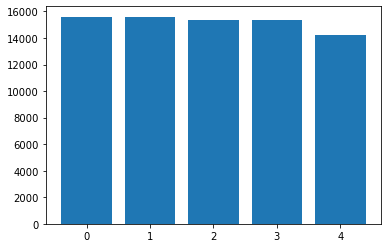

In [ ]:
prediction = model.predict(X_test_reshaped)
myprediction=[np.argmax(pred) for pred in prediction ]
counts=pd.Series(myprediction).value_counts()
unique_labels=[sorted(np.unique(myprediction))]
plt.bar(unique_labels[0],counts)
print(pd.Series(myprediction).value_counts())

Creo 4 capas de atencion multicabeza(pueden poner la atencion en varios sitios) con las cabezas y neuronas especificadas. Luego unas capas normalizadoras que ayudan a estabilizar la red y al aprendizaje puede ser mas rapido y mejor.

Luego creo otras 4 capas densas con muchas mas neuronas y van a ser TimeDistributed para que puedan procesar a la vez todos los pasos de tiempo. (creo que es portque tenemos que tener el dataset como(número de muestras, número de pasos de tiempo, número de características)). a demasd otras 4 iguales pero con menos neuronas y funcion linear. finalmente otras 4 normalizadoras.
Ahora para cada una de estas 4: creo la atencion cogiendo la capa de atencion y le paso dos veces x (la secuencia de entrada y la secuencia objetivo, si fuera traduccion por ejemplo se pondria la frase en español y en ingles, pero aqui es igual), y ahora actualizo la x con a la capa normalizadora a la que se le pasa el input(x) mas parte de la atencion(el dropout esta tirando parte de la atencion que habiamos creado).

Luego le paso x por los dos tipos de capas densas que habia creado(ffn_layers contiene los dos tipos asi que hay que coger la 1 y la 5, la 2 y la 6, 3 y 7...) y finalmente actualizo x otra vez pasandole a la capa normalizadora x mas parte (dropout) del output de la densa).

Finalmente se usa una red LSTM para captar la dependenbcias a largo plazo. El bidireccional es para que analize tanto de atras alante como al reves, es util si en este caso el futuro influye en el asado.



In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label='training loss')
plt.plot(val_loss,label='validation loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc,label='training accuracy')
plt.plot(val_acc,label='validation accuracy')
plt.xlabel('iterations')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
ruta_archivo = '/content/drive/My Drive/redes_neuronales/Transformer.h5'
model.save(ruta_archivo)

In [ ]:
new_row=pd.DataFrame({'model': 'Transformer','train loss':[train_loss[-1]], 'test loss':test_loss, 'train accuracy':[train_acc[-1]], 'test accuracy':test_acc})
new_row

## 3.4 sklearn.ensemble.HistGradientBoostingClassifier

## Pipeline

In [ ]:
Y_train=df.loc[:,'Class']
X_train=df.iloc[:,1:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

X_train=X_train.sort_index()
Y_train=Y_train.sort_index()
X_test=X_test.sort_index()
y_test=Y_test.sort_index()

X_train_reshaped =reshape_dataset(X_train.values, 10)
X_test_reshaped =reshape_dataset(X_test.values, 10)

model = keras.Sequential()
model.add(layers.LSTM(256, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_score])

Iter0
Epoch 1/3
85/85 [==============================] - 65s 769ms/step - loss: 2.6977e-04 - f1_score: 0.3572 - val_loss: 0.0062 - val_f1_score: 0.3810
Epoch 2/3
85/85 [==============================] - 65s 763ms/step - loss: 1.6066e-04 - f1_score: 0.3573 - val_loss: 0.0064 - val_f1_score: 0.3810
Epoch 3/3
821/821 [==============================] - 14s 17ms/step - loss: 5.8863 - f1_score: 0.2682
Test f1: 0.26815515756607056
0    25750
2      330
4       96
1       85
3        4
dtype: int64
Iter1
Epoch 1/3
85/85 [==============================] - 75s 887ms/step - loss: 1.2500e-04 - f1_score: 0.3573 - val_loss: 0.0066 - val_f1_score: 0.3810
Epoch 2/3
85/85 [==============================] - 73s 862ms/step - loss: 1.2411e-04 - f1_score: 0.3572 - val_loss: 0.0065 - val_f1_score: 0.3810
Epoch 3/3
821/821 [==============================] - 16s 19ms/step - loss: 5.9836 - f1_score: 0.2682
Test f1: 0.2682158648967743
0    25593
2      419
1      131
4      119
3        3
dtype: int64
Iter2
Epo

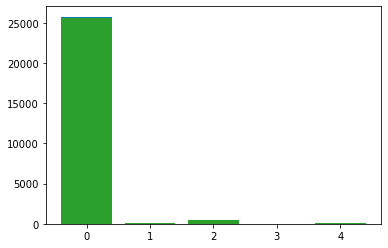

In [ ]:
order=[1,1,3]
f1_list=[]
for i in range(3):
    print('Iter'+str(i))
    X_train_spline=pd.DataFrame()
    X_train_spline = X_train.interpolate(method='spline', order=order[i])
    X_train_spline=X_train_spline.iloc[1:,:]
    Y_train_spline=Y_train.iloc[1:]

    #Sampling 
    counts=pd.Series(Y_train_spline).value_counts()
    strategy1=[{0: int(counts[0]*0.9)},{0: int(counts[0]*0.9)},{0: int(counts[0]*0.4)}]
    rus = RandomUnderSampler(random_state=0,sampling_strategy=strategy1[i])
    X_train_interpolate_resampled, y_train_interpolate_resampled = rus.fit_resample(X_train_spline, Y_train_spline)

    counts=pd.Series(y_train_interpolate_resampled).value_counts()    
    strategy2=[{0: int(counts[0]), 1:int(counts[0]*0.8), 2: int(counts[0]*0.8), 3:int(counts[0]*0.8), 4:int(counts[0]*0.8)},
           {0: int(counts[0]), 1:int(counts[0]*0.8), 2: int(counts[0]*0.8), 3:int(counts[0]*0.8), 4:int(counts[0]*0.8)},
           {0: int(counts[0]), 1:int(counts[0]*0.3), 2: int(counts[0]*0.6), 3:int(counts[0]*0.3), 4:int(counts[0]*0.6)},
           {0: int(counts[0]), 1:int(counts[0]*0.7), 2: int(counts[0]*0.6), 3:int(counts[0]*0.8), 4:int(counts[0]*0.6)}]

    counts=pd.Series(y_train_interpolate_resampled).value_counts()
    ros = RandomOverSampler(random_state=0,sampling_strategy=strategy2[i])
    X_train_interpolate_resampled, y_train_interpolate_resampled = ros.fit_resample(X_train_interpolate_resampled, y_train_interpolate_resampled)

    #Test 
    X_test_interpolate = X_test.interpolate(method='spline', order=order[i])
    X_test_interpolate=X_test_interpolate.iloc[2:,:]
    Y_test_interpolate=Y_test[2:]
    
    #Get values
    x_train=X_train_interpolate_resampled.values
    x_test=X_test_interpolate.values
    y_train=y_train_interpolate_resampled.values
    y_test=Y_test_interpolate.values
    #normalize
    mean = x_train.mean(axis=0)
    std = x_train.std(axis=0)
    x_train = (x_train - mean) / std
    x_test = (x_test - mean) / std

    #Reshape 
    X_train_reshaped = reshape_dataset(x_train,n_steps=10)
    X_test_reshaped = reshape_dataset(x_test,n_steps=10)
    
    history = model.fit(X_train_reshaped, y_train,epochs=3,batch_size=2048,validation_split=0.1)
    test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
    f1_list.append(test_acc)
    print('Test f1:', test_acc)
    myprediction=plotResults(model,X_test_reshaped)

# 4. Prediction


In [ ]:
df = pd.read_csv('Train_set.csv')
df_test = pd.read_csv('Test_set.csv')

In [ ]:
%run kaggleFunctions.ipynb

In [ ]:
# X_train_reshaped,y_train,X_test_reshaped=finalPreprocessing(df,df_test,3)
# plotY(y_train)

In [ ]:
X_cluster=pd.read_csv('X_cluster_smoothnoise8_13.csv')
Y_cluster=pd.read_csv('Y_cluster_smoothnoise8_13.csv')
Y_cluster=np.array(Y_cluster).ravel()


0.0    59564
4.0    57879
2.0    52092
1.0    26676
3.0     7692
dtype: int64


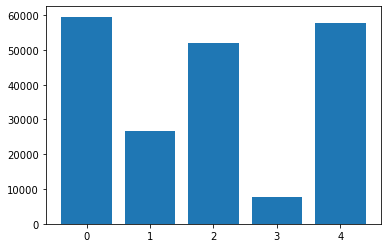

In [ ]:
plotY(Y_cluster)

In [ ]:
X_test=df_test.iloc[:,1:]
X_test=X_test.apply(zeros,axis=1)
X_test_interpolate = X_test.interpolate(method='linear')
# X_test_interpolate=X_test_interpolate.iloc[2:,:]

In [ ]:
X_train=X_cluster.values
X_test=X_test_interpolate.values
y_train=Y_cluster

In [ ]:
# mean = X_train.mean(axis=0)
# std = X_train.std(axis=0)
# X_train = (X_train - mean) / std
# X_test = (X_test - mean) / std

rehsapes

In [ ]:
X_train_reshaped = reshape_dataset(X_train, n_steps=10)
X_test_reshaped = reshape_dataset(X_test, n_steps=10)

ValueError: cannot reshape array of size 1870 into shape (10,18)

In [ ]:
X_train_reshaped=np.reshape(X_train,[X_train.shape[0],X_train.shape[1],1])
X_test_reshaped=np.reshape(X_test,[X_test.shape[0],X_test.shape[1],1])

In [ ]:
n_steps =4
n_features = X_train.shape[1]
X_train_reshaped = X_train.reshape(-1, n_steps, n_features)
X_test_reshaped = X_test.reshape(-1, n_steps, n_features)

In [ ]:
X_train_reshaped = np.stack(X_cluster.apply(lambda row: [row.to_numpy(), fft(row.to_numpy())], axis=1).values)
X_test_reshaped = np.stack(X_test_interpolate.apply(lambda row: [row.to_numpy(), fft(row.to_numpy())], axis=1).values)

In [ ]:
X_test_reshaped.shape

(21892, 2, 187)

LSTM

In [ ]:
n_steps=10
batch_size=2
epochs=10
model = keras.Sequential()
#model.add(layers.LSTM(128, return_sequences=True, stateful=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(layers.LSTM(128, return_sequences=True, stateful=True, batch_input_shape=(batch_size, n_steps, n_features)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True, stateful=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32, return_sequences=True, stateful=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(16, stateful=True))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_score])
#history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=2056, validation_split=0.1)
for i in range(epochs-1):
    model.fit(X_train_reshaped, y_train, epochs=1, batch_size=batch_size, validation_split=0.1,shuffle=False)
    model.reset_states()
model.fit(X_train_reshaped, y_train, epochs=1, batch_size=batch_size, validation_split=0.1, shuffle=False)


In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(512, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(256, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(16))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_score])
#history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=2056, validation_split=0.1)
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_split=0.1)


Epoch 1/20
645/645 [==============================] - 28s 34ms/step - loss: 0.8415 - f1_score: 0.2558 - val_loss: 0.6234 - val_f1_score: 0.3389
Epoch 2/20
645/645 [==============================] - 21s 32ms/step - loss: 0.5125 - f1_score: 0.3162 - val_loss: 0.6073 - val_f1_score: 0.3192
Epoch 3/20
645/645 [==============================] - 21s 32ms/step - loss: 0.4063 - f1_score: 0.3195 - val_loss: 0.4022 - val_f1_score: 0.3393
Epoch 4/20
645/645 [==============================] - 21s 32ms/step - loss: 0.3424 - f1_score: 0.3354 - val_loss: 0.3703 - val_f1_score: 0.3551
Epoch 5/20
645/645 [==============================] - 21s 32ms/step - loss: 0.3007 - f1_score: 0.3437 - val_loss: 0.3828 - val_f1_score: 0.3544
Epoch 6/20
645/645 [==============================] - 21s 32ms/step - loss: 0.2649 - f1_score: 0.3464 - val_loss: 0.3305 - val_f1_score: 0.3642
Epoch 7/20
645/645 [==============================] - 21s 33ms/step - loss: 0.2419 - f1_score: 0.3474 - val_loss: 0.3444 - val_f1_score:

CNN

In [ ]:
X_train_reshaped=np.reshape(X_train,[X_train.shape[0],X_train.shape[1],1])
X_test_reshaped=np.reshape(X_test,[X_test.shape[0],X_test.shape[1],1])

In [ ]:
model =keras.Sequential()

# Agregamos las capas convolucionales
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train_reshaped.shape[1],X_train_reshaped.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
# Aplanamos los datos
model.add(Flatten())

# Agregamos capas densas
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_score])

# Entrenamos el modelo
model.fit(X_train_reshaped, y_train, epochs=25, batch_size=128, validation_split=0.1)

Epoch 1/25
  32/1434 [..............................] - ETA: 56s - loss: 1.2828 - f1_score: 0.1351

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 185, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 92, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 45, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 43, 128)           24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [ ]:
X_train_reshaped=np.reshape(X_train_reshaped,[X_train_reshaped.shape[0],X_train_reshaped.shape[2],X_train_reshaped.shape[1]])
X_test_reshaped=np.reshape(X_test_reshaped,[X_test_reshaped.shape[0],X_test_reshaped.shape[2],X_test_reshaped.shape[1]])

In [ ]:
model =keras.Sequential()

# Agregamos las capas convolucionales
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(X_train_reshaped.shape[1],X_train_reshaped.shape[2],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Aplanamos los datos
model.add(Flatten())

# Agregamos capas densas
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_score])

# Entrenamos el modelo
model.fit(X_train_reshaped, y_train, epochs=15, batch_size=32, validation_split=0.1)

ValueError: Exception encountered when calling layer "conv2d_2" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_2/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_2/Conv2D/ReadVariableOp)' with input shapes: [?,187,2,1], [3,3,1,32].

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 187, 2, 1), dtype=float32)

Transformer

In [ ]:
#1h
input_shape = X_train_reshaped.shape[1:]
output_shape = len(np.unique(y_train))
hidden_size = 64
num_layers = 4
dropout_rate = 0.1
num_heads = 4

# Capas de atención multi-cabeza y normalización de capas
attention_layers = [MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size) for _ in range(num_layers)]
attention_norm_layers = [LayerNormalization() for _ in range(num_layers)]

# lstm_layers = [Bidirectional(LSTM(hidden_size*2, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))) for _ in range(num_layers)]
# lstm_layers += [TimeDistributed(LSTM(input_shape[1])) for _ in range(num_layers)]
# lstm_norm_layers = [LayerNormalization() for _ in range(num_layers)]

# Capas feedforward y normalización de capas
ffn_layers = [TimeDistributed(Dense(hidden_size * 4, activation='relu')) for _ in range(num_layers)]
# ffn_layers += [TimeDistributed(Dense(hidden_size * 4, activation='relu')) for _ in range(num_layers)]
ffn_layers += [TimeDistributed(Dense(input_shape[1])) for _ in range(num_layers)]
ffn_norm_layers = [LayerNormalization() for _ in range(num_layers)]

# Capa de entrada
inputs = Input(shape=input_shape)
# Capas de la red
x = inputs
for i in range(num_layers):
    # Capas de atención multi-cabeza
    attention = attention_layers[i](x, x)
    x = attention_norm_layers[i](x + Dropout(dropout_rate)(attention))
    
#     ls = lstm_layers[i](x)
#     ls = lstm_layers[i + num_layers](ls) 
#     print(x.shape)
#     print(ls.shape)
    
#     x = lstm_norm_layers[i](x + Dropout(dropout_rate)(ls))

    # Capas feedforward
    ffn = ffn_layers[i](x)
    ffn = ffn_layers[i + num_layers](ffn)  #i + num_layers xq ffn_layers tiene dos grupos, 2 grupos de 4(num_layers)
    x = ffn_norm_layers[i](x + Dropout(dropout_rate)(ffn))

# Capa de salida
x = Bidirectional(LSTM(hidden_size, return_sequences=False))(x)
outputs = Dense(output_shape, activation='softmax')(x)

# Modelo
model = Model(inputs=inputs, outputs=outputs)
# Compilación del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[f1_score])

# Entrenamiento del modelo
history = model.fit(X_train_reshaped, y_train, batch_size=1024, epochs=9, validation_split=0.1)

Epoch 1/9
141/141 [==============================] - 2325s 16s/step - loss: 1.4170 - f1_score: 0.0000e+00 - val_loss: 1.9297 - val_f1_score: 0.0000e+00
Epoch 2/9
102/141 [====================>.........] - ETA: 10:13 - loss: 1.3999 - f1_score: 0.0000e+00

KeyboardInterrupt: 

DNN

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_score])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


Epoch 1/30
4500/4500 [==============================] - 31s 7ms/step - loss: 0.3815 - f1_score: 0.3426 - val_loss: 0.4688 - val_f1_score: 0.3541
Epoch 2/30
4500/4500 [==============================] - 38s 9ms/step - loss: 0.2369 - f1_score: 0.3540 - val_loss: 0.3318 - val_f1_score: 0.3514
Epoch 3/30
4500/4500 [==============================] - 38s 8ms/step - loss: 0.1910 - f1_score: 0.3560 - val_loss: 0.2301 - val_f1_score: 0.3577
Epoch 4/30
4500/4500 [==============================] - 38s 9ms/step - loss: 0.1623 - f1_score: 0.3568 - val_loss: 0.2558 - val_f1_score: 0.3574
Epoch 5/30
4500/4500 [==============================] - 38s 8ms/step - loss: 0.1426 - f1_score: 0.3573 - val_loss: 0.1909 - val_f1_score: 0.3593
Epoch 6/30
4500/4500 [==============================] - 38s 8ms/step - loss: 0.1294 - f1_score: 0.3577 - val_loss: 0.1792 - val_f1_score: 0.3595
Epoch 7/30
4500/4500 [==============================] - 39s 9ms/step - loss: 0.1157 - f1_score: 0.3582 - val_loss: 0.1196 - val_f1

0    17725
4     1683
2     1654
1      603
3      227
dtype: int64


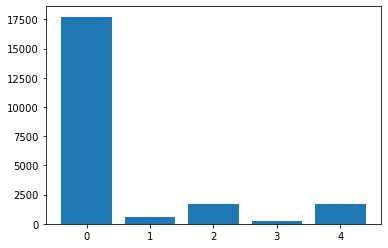

In [ ]:
mypredictionDNN=plotResults(model,X_test)

In [ ]:
solutions=pd.DataFrame({'ID':[i for i in range(21892)],'Pred_Class':+mypredictionDNN})
solutions.to_csv('solutionDNN.csv', index=False)

CNN transformer

In [ ]:
X_train_reshaped=np.reshape(X_train,[X_train.shape[0],X_train.shape[1],1])
X_test_reshaped=np.reshape(X_test,[X_test.shape[0],X_test.shape[1],1])

In [ ]:
#1h
input_shape = X_train_reshaped.shape[1:]
output_shape = len(np.unique(y_train))
hidden_size = 64
num_layers = 4
dropout_rate = 0.1
num_heads = 4

attention_layers = [MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size) for _ in range(num_layers)]
attention_norm_layers = [LayerNormalization() for _ in range(num_layers)]

ffn_layers = [TimeDistributed(Dense(hidden_size * 4, activation='relu')) for _ in range(num_layers)]
ffn_layers += [TimeDistributed(Dense(hidden_size * 4, activation='relu')) for _ in range(num_layers)]
ffn_layers += [TimeDistributed(Dense(input_shape[1])) for _ in range(num_layers)]
ffn_norm_layers = [LayerNormalization() for _ in range(num_layers)]

# Definir la forma de entrada
inputs = Input(shape=input_shape)
# Agregar capas convolucionales 1D
conv1 = layers.Conv1D(32, 3, activation='relu')(inputs)
conv1 = layers.MaxPooling1D(2)(conv1)
conv2 = layers.Conv1D(64, 3, activation='relu')(conv1)
conv2 = layers.MaxPooling1D(2)(conv2)
conv3 = layers.Conv1D(128, 3, activation='relu')(conv2)
conv3 = layers.MaxPooling1D(2)(conv3)
x =  conv3
for i in range(num_layers):
    # Capas de atención multi-cabeza
    attention = attention_layers[i](x, x)
    x = attention_norm_layers[i](x + Dropout(dropout_rate)(attention))

    # Capas feedforward
    ffn = ffn_layers[i](x)
    ffn = ffn_layers[i + num_layers](ffn)
    ffn = ffn_layers[i + num_layers*2](ffn)
    x = ffn_norm_layers[i](x + Dropout(dropout_rate)(ffn))


# Agregar capas densas
flatten = layers.Flatten()(x)
dense1 = layers.Dense(256, activation='relu')(flatten)
dense1=layers.Dropout(0.1)(dense1)
dense2 = layers.Dense(128, activation='relu')(dense1)
dense2=layers.Dropout(0.1)(dense2)
dense3 = layers.Dense(64, activation='relu')(dense2)
dense3=layers.Dropout(0.1)(dense3)
dense4 = layers.Dense(32, activation='relu')(dense3)
dense4=layers.Dropout(0.1)(dense4)
# Capa de salida
outputs = layers.Dense(5, activation='softmax')(dense4)

# Crear modelo
model =Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[f1_score])

# Entrenamiento del modelo
history = model.fit(X_train_reshaped, y_train, batch_size=1024, epochs=9, validation_split=0.1)

Epoch 1/9
42/42 [==============================] - 102s 2s/step - loss: 0.9297 - f1_score: 0.2484 - val_loss: 0.6174 - val_f1_score: 0.3634
Epoch 2/9
42/42 [==============================] - 96s 2s/step - loss: 0.4276 - f1_score: 0.3284 - val_loss: 0.2838 - val_f1_score: 0.3682
Epoch 3/9
42/42 [==============================] - 97s 2s/step - loss: 0.2861 - f1_score: 0.3395 - val_loss: 0.1582 - val_f1_score: 0.3753
Epoch 4/9
42/42 [==============================] - 97s 2s/step - loss: 0.2369 - f1_score: 0.3420 - val_loss: 0.2093 - val_f1_score: 0.3800
Epoch 5/9
42/42 [==============================] - 96s 2s/step - loss: 0.2052 - f1_score: 0.3441 - val_loss: 0.1613 - val_f1_score: 0.3765
Epoch 6/9
42/42 [==============================] - 96s 2s/step - loss: 0.1813 - f1_score: 0.3452 - val_loss: 0.1797 - val_f1_score: 0.3783
Epoch 7/9
42/42 [==============================] - 96s 2s/step - loss: 0.1580 - f1_score: 0.3463 - val_loss: 0.0625 - val_f1_score: 0.3780
Epoch 8/9
42/42 [=========

In [ ]:
inputs = Input(shape=input_shape)
# Agregar capas convolucionales 1D
conv1 = layers.Conv1D(32, 3, activation='relu')(inputs)
conv1 = layers.MaxPooling1D(2)(conv1)
conv2 = layers.Conv1D(64, 3, activation='relu')(conv1)
conv2 = layers.MaxPooling1D(2)(conv2)
conv3 = layers.Conv1D(128, 3, activation='relu')(conv2)
conv3 = layers.MaxPooling1D(2)(conv3)
# Agregar capa de atención
attention = layers.MultiHeadAttention(num_heads=4, key_dim=64)(conv3, conv3)
attention = layers.Dropout(0.1)(attention)
attention = layers.LayerNormalization(epsilon=1e-6)(attention)

# Agregar capas densas
flatten = layers.Flatten()(attention)
dense1 = layers.Dense(256, activation='relu')(flatten)
dense1=layers.Dropout(0.1)(dense1)
dense2 = layers.Dense(128, activation='relu')(dense1)
dense2=layers.Dropout(0.1)(dense2)
dense3 = layers.Dense(64, activation='relu')(dense2)
dense3=layers.Dropout(0.1)(dense3)
dense4 = layers.Dense(64, activation='relu')(dense3)
dense4=layers.Dropout(0.1)(dense4)
# Capa de salida
outputs = layers.Dense(5, activation='softmax')(dense3)

# Crear modelo
model =Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[f1_score])

# Entrenamiento del modelo
history = model.fit(X_train_reshaped, y_train, batch_size=1024, epochs=9, validation_split=0.1)

SVM

In [ ]:
svc = SVC(decision_function_shape='ovr')
param_grid = {'C': [0.5, 1, 3,10],'degree': [2,4,5],'kernel':['poly','rbf']}
scorer = make_scorer(f1, average='weighted')

grid_search = GridSearchCV(
    svc,
    param_grid,
    scoring=scorer,
    cv=3,
    verbose=1,
)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Puntaje F1:", grid_search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores hiperparámetros: {'C': 10, 'degree': 4, 'kernel': 'poly'}
Puntaje F1: 0.8358507547151555


In [ ]:
svc = SVC(decision_function_shape='ovr',kernel='poly',degree=10,C=4)
svc.fit(X_train, y_train)

SVC(C=4, degree=10, kernel='poly')

0.0    18148
4.0     1544
2.0     1513
1.0      483
3.0      204
dtype: int64


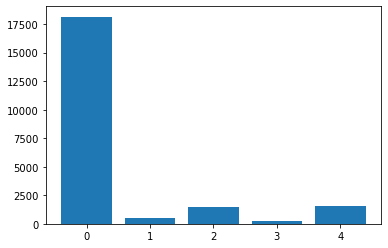

In [ ]:
# prediction = grid_search.best_estimator_.predict(X_test)
myprediction=svc.predict(X_test)
counts=pd.Series(myprediction).value_counts()
unique_labels=pd.Series(myprediction).value_counts().index
plt.bar(unique_labels,counts)
print(pd.Series(myprediction).value_counts())

In [ ]:
ruta_modelo = "/content/drive/My Drive/redes_neuronales/transformer.h5"
model.save(ruta_modelo)


In [ ]:
ruta_archivo = '/content/drive/My Drive/redes_neuronales/RNNHalf.h5'
model = load_model(ruta_archivo, custom_objects={"f1_score": f1_score })

In [ ]:
X_test.shape

(21892, 187)

0    17916
4     1644
2     1570
1      552
3      210
dtype: int64


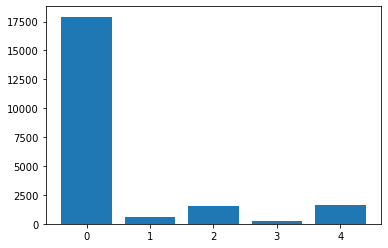

In [ ]:
myprediction=plotResults(model,X_test_reshaped)

In [ ]:
solutions=pd.DataFrame({'ID':[i for i in range(21892)],'Pred_Class':+myprediction})
solutions.to_csv('solution.csv', index=False)

Ensambled

In [ ]:
CNNnoise_pred = pd.read_csv('solutions88CNNnoise.csv')
previous_pred= pd.read_csv('solutionCNN87noise13.csv')

In [ ]:
Allpredictions=[CNNnoise_pred.loc[:,'Pred_Class'].values,DNN_pred.loc[:,'Pred_Class'].values,previous_pred.loc[:,'Pred_Class'].values]
my_final_prediction=mode(Allpredictions)

In [ ]:
myprediction=list(my_final_prediction.values())
index=list(my_final_prediction.keys())
solutions=pd.DataFrame({'ID':index,'Pred_Class':myprediction})
solutions.to_csv('solutions.csv', index=False)

# 5. Save

In [ ]:
performance=np.load('/content/drive/My Drive/redes_neuronales/resultadosModelos.npy',allow_pickle=True)
performance=pd.DataFrame(performance)
performance.columns=['model','train loss', 'test loss', 'train accuracy', 'test accuracy']

performance = pd.concat([performance, new_row], ignore_index=True)
performance

In [ ]:
# Definir la ruta y el nombre del archivo donde se guardará la matriz
ruta_archivo = '/content/drive/My Drive/redes_neuronales/resultadosModelos.npy'

# Guardar la matriz en el archivo .npy en la ruta especificada
np.save(ruta_archivo, performance)